In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
POINTS = 500

In [2]:
def lagrange_interpolation(X, Y, x):
    result = 0
    n = len(X)
    for i in range(n):
        li = Y[i]
        for j in range(n):
            if i != j:
                li *= (x - X[j]) / (X[i] - X[j])
        result += li
    return result

In [3]:
def calculate_coefficients(X, Y):
    n = len(X)
    A = np.empty((n, n))
    for i in range(n):
        A[i][0] = Y[i]
    for j in range(1,n):
        for i in range(n-j):
            A[i][j] = (A[i+1][j-1] - A[i][j-1]) / (X[i+j] - X[i])
    return A[0]

In [4]:
def newton_interpolation(X, Y, x):
    result = 0
    n = len(X)
    A = calculate_coefficients(X, Y)
    for i in range(n):
        product = A[i]
        for j in range(i):
            product *= (x - X[j])
        result += product
    return result

In [119]:
def chebyshev_roots(n):
    return np.flip(np.fromfunction(lambda i: np.cos(np.pi * (i + 0.5) / n), (n, )))

In [75]:
def chebyshev_nodes(a, b, n):
    if a > b:
        a, b = b, a
    roots = chebyshev_roots(n)
    stretch = (b - a) / 2
    return (roots + 1) * stretch + a

In [6]:
def f(x):
    return np.sin(2*x) * np.sin(x**2/np.pi)

In [126]:
def interpolate_lagrange(a, b, n):
    x_inter = np.linspace(a, b, n)
    x_print = np.linspace(a, b, POINTS)
    y_inter = f(x_inter)
    y_print = f(x_print)
    p_print = np.empty(POINTS)
    for i in range(POINTS):
        p_print[i] = lagrange_interpolation(x_inter, y_inter, x_print[i])
    return x_inter, x_print, y_inter, y_print, p_print

In [127]:
def print_interpolation_plots_lagrange_ch(n):
    X_inter = chebyshev_nodes(-np.pi, 2*np.pi, n)
    X_print = np.linspace(-np.pi, 2*np.pi, 500)
    Y_inter = f(X_inter)
    Y_print = f(X_print)
    P_print = np.empty(500)
    for i in range(500):
        P_print[i] = lagrange_interpolation(X_inter, Y_inter, X_print[i])
    print('Liczba węzłów:', n)
    print('Błąd interpolacji(norma euklidesowa):', np.linalg.norm(Y_print-P_print) / 500)
    print('Błąd interpolacji(norma maksimum):', np.linalg.norm(Y_print-P_print, ord=np.inf))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(X_print, P_print, label="W(x)")
    ax.plot(X_print, Y_print, label="f(x)")
    ax.plot(X_inter, Y_inter, '*', label='Węzły interpolacji')
    ax.legend()
    plt.show()

In [128]:
def interpolate_newton(a, b, n):
    X_inter = np.linspace(a, b, n)
    X_print = np.linspace(a, b, POINTS)
    Y_inter = f(X_inter)
    Y_print = f(X_print)
    P_print = np.empty(POINTS)
    for i in range(POINTS):
        P_print[i] = newton_interpolation(X_inter, Y_inter, X_print[i])
    return X_inter, X_print, Y_inter, Y_print, P_print

In [129]:
def print_errors(Y_print, P_print):
    print('Błąd interpolacji(norma euklidesowa):', np.linalg.norm(Y_print-P_print) / POINTS)
    print('Błąd interpolacji(norma maksimum):', np.linalg.norm(Y_print-P_print, ord=np.inf))

In [140]:
def print_plots(x_inter, x_print, y_inter, y_print, p_print):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(x_print, p_print, label="W(x)")
    ax.plot(x_print, y_print, label="f(x)")
    ax.plot(x_inter, y_inter, '*', label='Węzły interpolacji')
    ax.set_title('elo')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend()
    plt.show()

In [141]:
def exercise_newton(a, b, n):
    print('Liczba węzłów:', n)
    X_inter, X_print, Y_inter, Y_print, P_print = interpolate_newton(a, b, n)
    print_errors(Y_print, P_print)
    print_plots(X_inter, X_print, Y_inter, Y_print, P_print)

In [142]:
def exercise_lagrange(a, b, n):
    print('Liczba węzłów:', n)
    X_inter, X_print, Y_inter, Y_print, P_print = interpolate_lagrange(a, b, n)
    print_errors(Y_print, P_print)
    print_plots(X_inter, X_print, Y_inter, Y_print, P_print)

Liczba węzłów: 2
Błąd interpolacji(norma euklidesowa): 0.02188019112185965
Błąd interpolacji(norma maksimum): 0.9922962011314661


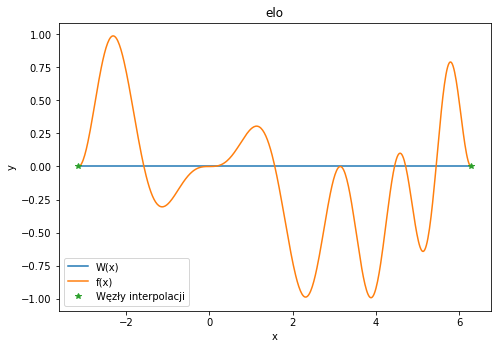

Liczba węzłów: 3
Błąd interpolacji(norma euklidesowa): 0.02188019112185965
Błąd interpolacji(norma maksimum): 0.9922962011314662


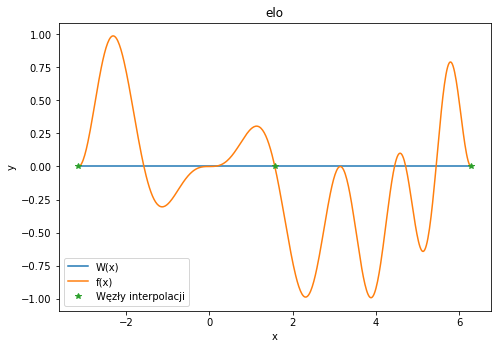

Liczba węzłów: 4
Błąd interpolacji(norma euklidesowa): 0.02188019112185965
Błąd interpolacji(norma maksimum): 0.9922962011314661


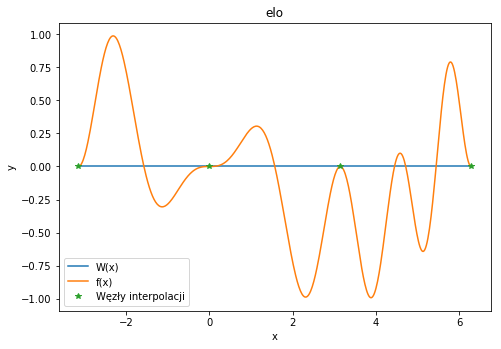

Liczba węzłów: 5
Błąd interpolacji(norma euklidesowa): 0.029403887995601532
Błąd interpolacji(norma maksimum): 1.5085136408658544


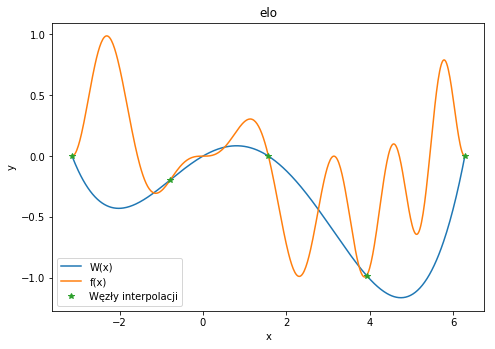

Liczba węzłów: 6
Błąd interpolacji(norma euklidesowa): 0.030090328420224542
Błąd interpolacji(norma maksimum): 1.8595327144200677


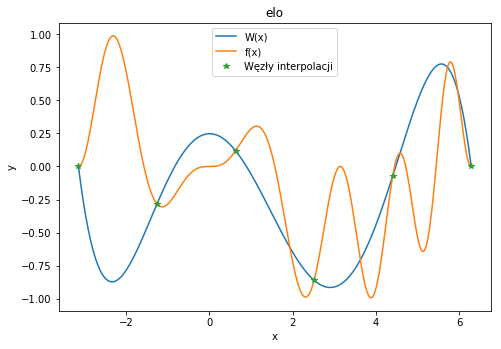

Liczba węzłów: 7
Błąd interpolacji(norma euklidesowa): 0.02188019112185965
Błąd interpolacji(norma maksimum): 0.9922962011314662


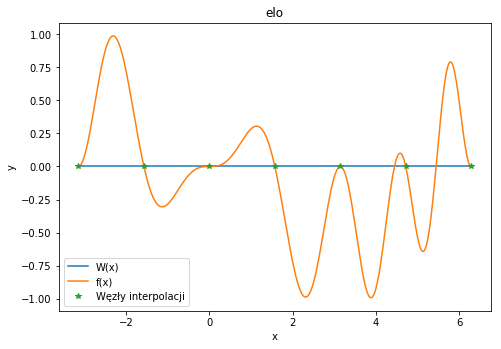

Liczba węzłów: 8
Błąd interpolacji(norma euklidesowa): 0.03141640295948081
Błąd interpolacji(norma maksimum): 2.3549454737950204


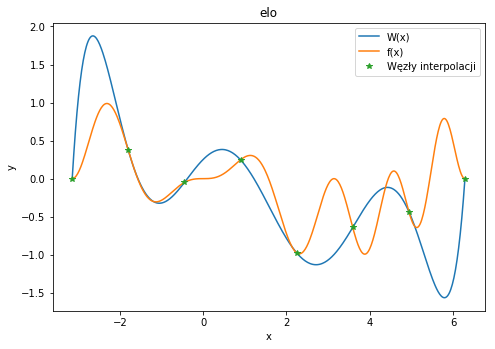

Liczba węzłów: 9
Błąd interpolacji(norma euklidesowa): 0.018685909425285942
Błąd interpolacji(norma maksimum): 1.0716534442093402


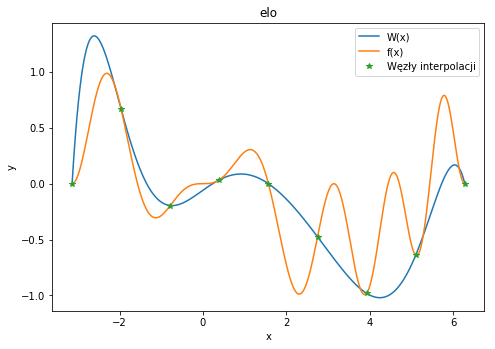

Liczba węzłów: 10
Błąd interpolacji(norma euklidesowa): 0.05168299748012022
Błąd interpolacji(norma maksimum): 4.09595040428284


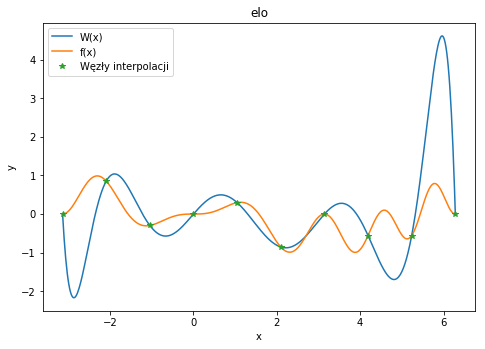

Liczba węzłów: 15
Błąd interpolacji(norma euklidesowa): 0.4424041698242089
Błąd interpolacji(norma maksimum): 50.9598981994982


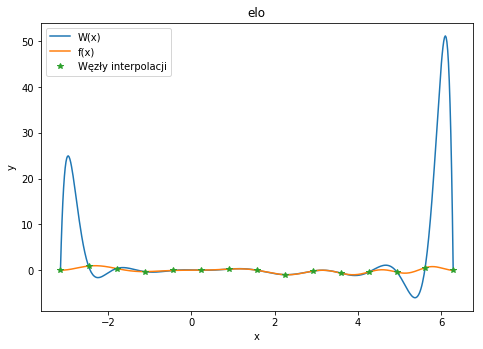

Liczba węzłów: 20
Błąd interpolacji(norma euklidesowa): 0.18639975693656177
Błąd interpolacji(norma maksimum): 27.149405544854634


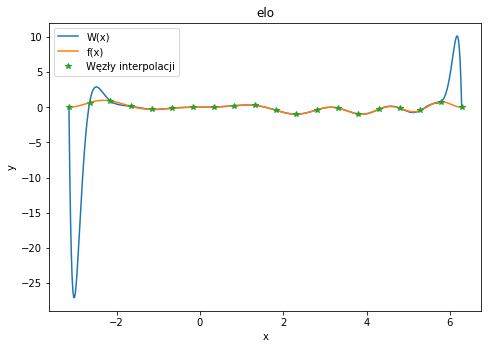

Liczba węzłów: 25
Błąd interpolacji(norma euklidesowa): 0.11214974866111503
Błąd interpolacji(norma maksimum): 19.41223237920069


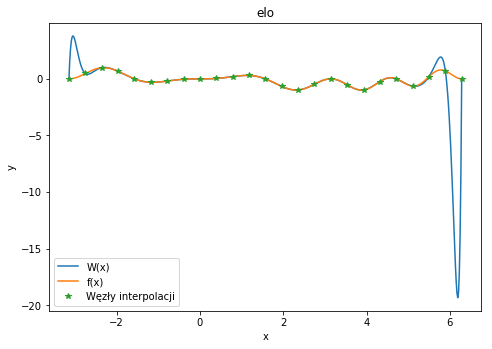

Liczba węzłów: 30
Błąd interpolacji(norma euklidesowa): 0.01408124497936521
Błąd interpolacji(norma maksimum): 2.5635927052005


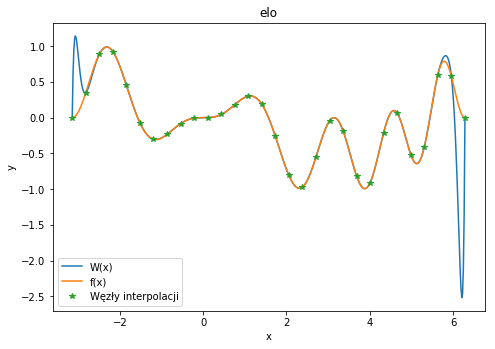

In [143]:
a = -np.pi
b = 2 * np.pi
for i in range(2, 11):
    exercise_lagrange(a, b, i)
for i in range(15, 31, 5):
    exercise_lagrange(a, b, i)

Liczba węzłów: 2
Błąd interpolacji(norma euklidesowa): 0.020898980707736374
Błąd interpolacji(norma maksimum): 1.2447684446540033


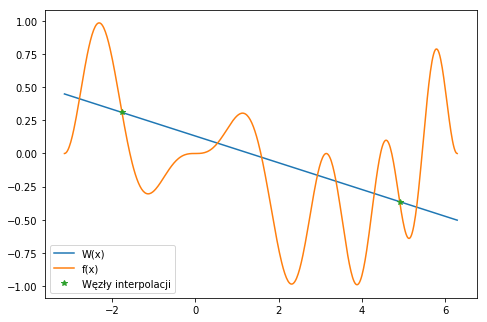

Liczba węzłów: 3
Błąd interpolacji(norma euklidesowa): 0.02542108154008363
Błąd interpolacji(norma maksimum): 1.1732081694908745


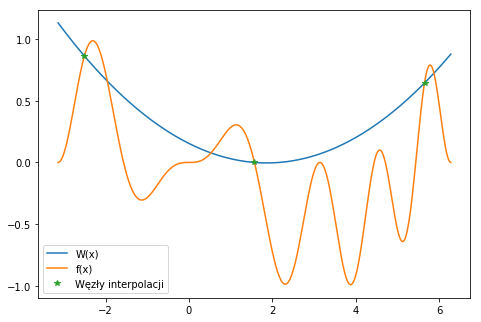

Liczba węzłów: 4
Błąd interpolacji(norma euklidesowa): 0.01894739084190702
Błąd interpolacji(norma maksimum): 0.8997933890517833


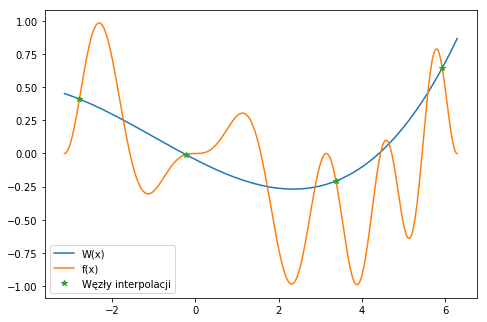

Liczba węzłów: 5
Błąd interpolacji(norma euklidesowa): 0.02164325240858998
Błąd interpolacji(norma maksimum): 1.1437598751734728


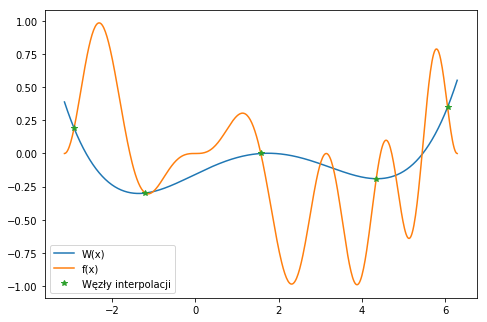

Liczba węzłów: 6
Błąd interpolacji(norma euklidesowa): 0.01738757192157997
Błąd interpolacji(norma maksimum): 0.8303810119757298


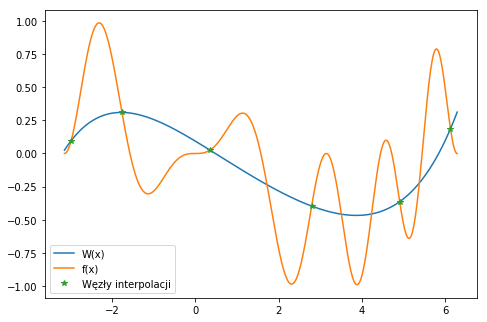

Liczba węzłów: 7
Błąd interpolacji(norma euklidesowa): 0.018696874393419594
Błąd interpolacji(norma maksimum): 0.935279526662814


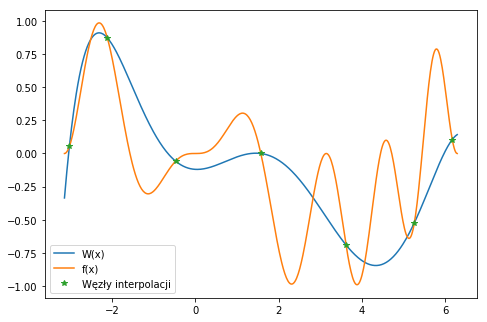

Liczba węzłów: 8
Błąd interpolacji(norma euklidesowa): 0.016370469710502576
Błąd interpolacji(norma maksimum): 1.0852007406933182


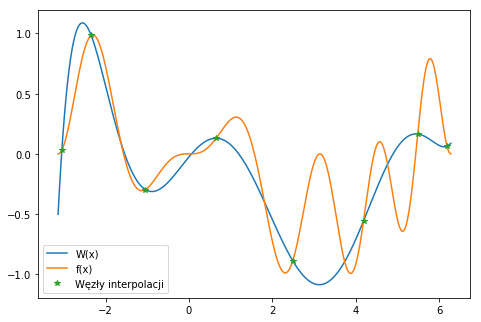

Liczba węzłów: 9
Błąd interpolacji(norma euklidesowa): 0.01923953001753598
Błąd interpolacji(norma maksimum): 1.0081769794645206


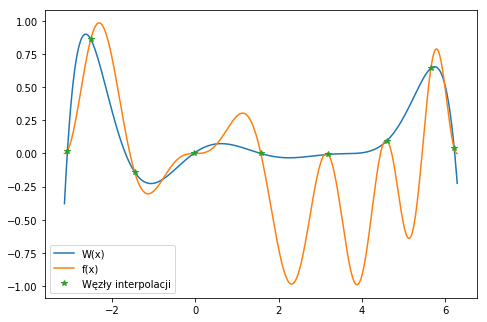

Liczba węzłów: 10
Błąd interpolacji(norma euklidesowa): 0.0158163244101824
Błąd interpolacji(norma maksimum): 1.0711306102427172


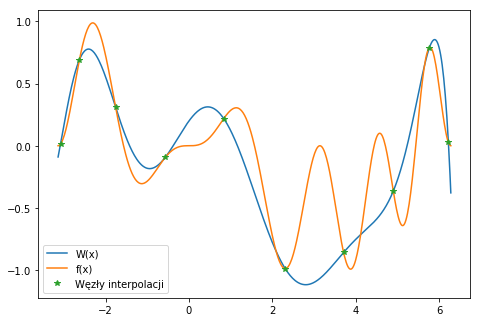

Liczba węzłów: 15
Błąd interpolacji(norma euklidesowa): 0.013990427962496811
Błąd interpolacji(norma maksimum): 0.9320106553531369


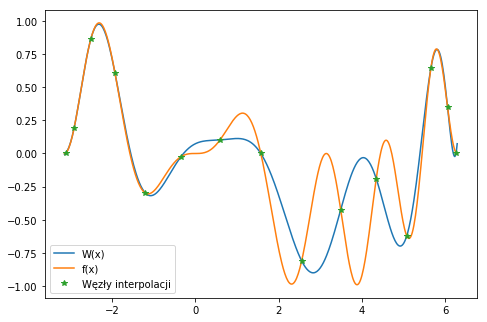

Liczba węzłów: 20
Błąd interpolacji(norma euklidesowa): 0.0026929815770698274
Błąd interpolacji(norma maksimum): 0.16553614738375502


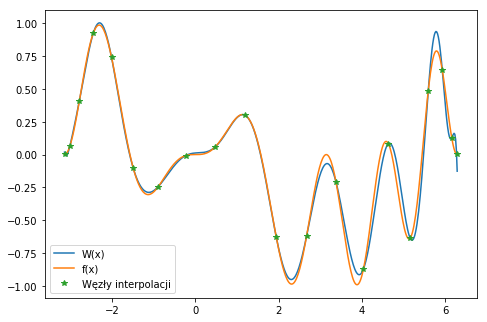

Liczba węzłów: 25
Błąd interpolacji(norma euklidesowa): 0.00013683442589279058
Błąd interpolacji(norma maksimum): 0.005633676332207904


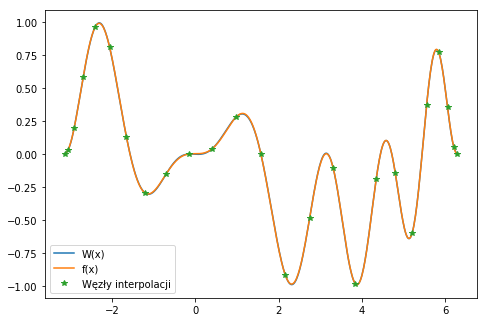

Liczba węzłów: 30
Błąd interpolacji(norma euklidesowa): 6.521689612497919e-06
Błąd interpolacji(norma maksimum): 0.00029006536343048617


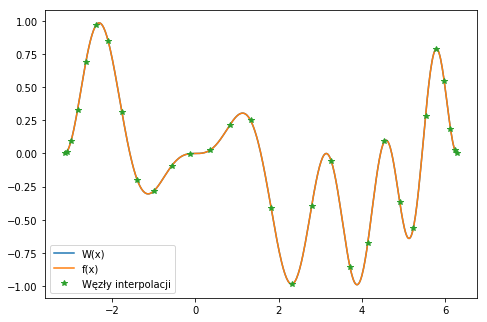

In [88]:
for i in range(2,11):
    print_interpolation_plots_lagrange_ch(i)
print_interpolation_plots_lagrange_ch(15)
print_interpolation_plots_lagrange_ch(20)
print_interpolation_plots_lagrange_ch(25)
print_interpolation_plots_lagrange_ch(30)

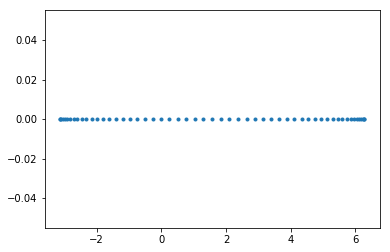

In [120]:
n = 55
a = -np.pi
b = 2 * np.pi
plt.plot(chebyshev_nodes(a, b, n), np.zeros(n), '.')

In [148]:
import pandas as pd

In [ ]:
pd.DataFrame.from_dict()